Для построения автоматизированной системы определения рыночной стоимости квартиры, необходимо рассмотреть имеющиеся данные по продажам квартир в архиве. Нам предоставлены объявления о продаже квартир в Санкт-петербурге и Ленинградской области за несколько лет. Главная задача - найти особенности формирования рыночной цены квартиры. Для понимания факторов формирования стоимости жилья, далее будут исследованы возможные зависимости рыночной цены от параметров жилья (площади квартиры, параметров дома и др.), географического расположения объекта (удаленности от центра, парков и т.д.) и даже от времени публикования объявления.
План работы:
1. Общий анализ данных.
2. Предобработка данных.
3. Расчет новых данных
4. Исследовательский анализ данныз.
5. Общий вывод.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.info()
print(data.head(20))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Общая информация о таблице показывает, что у нас 23699 объявлений. Не во всех объявлениях указана высота потолка (почти в половине квартир эти данные не заполнены), общее количество этажей в доме, жилая площадь, площадь кухни. Данные по наличию балконов есть не во всех квартирах - это логично, балконы есть не у всех. Во многих объявлениях отсутствуют данные о географическом расположении - расстояние до аэропорта, наличие парков вокруг. Есть объявления, где пропущено даже название населенного пункта. Это ошибка пользователя, вероятнее всего.

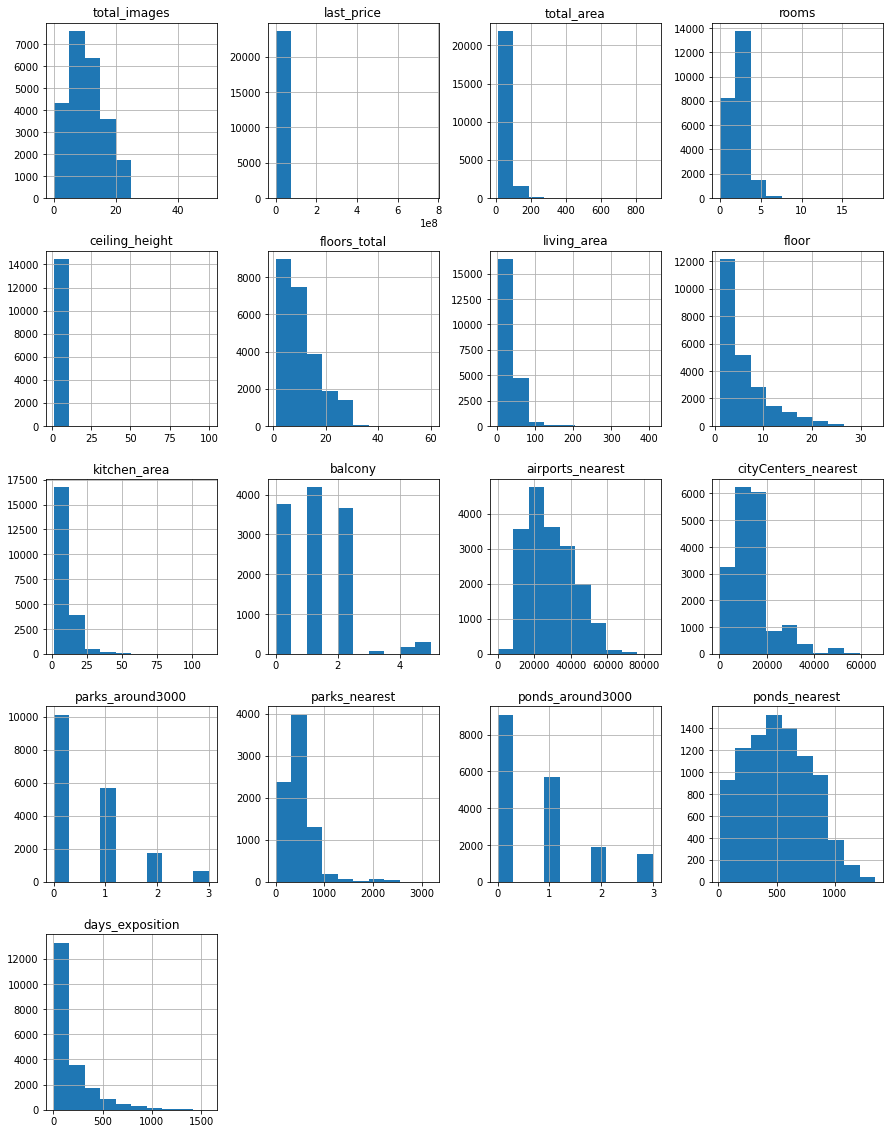

In [3]:
data.hist(bins = 10, figsize=(15, 20));

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


Гистограммы позволяют изучить какие данные заложены в каждом параметре.

По количеству фотографий - есть объявления, в которых фотографий минимум (около 5), у большинства футь менее 10 фото.

Цена есть у каждого объявления, но есть объявления, где она указана =0.

Площадь у большинста квартир менее 100 кв. метров. Чуть больше 2000 объявлений, где площадь квартиры более 100 кв. метров, и некоторое минимальное количество, где площадь более 200 кв. метров.

По высоте потолков имеются данные только у 14.5 тысяч квартир, разброс значений довольно велик от чуть более 0 до 10. В этих данных явно есть ошибки.

Количество балконов - данные, которые могут содержать неточности: в некотором колистве квартир указано 3 и более балконов.

У большинства квартир есть рядом парки, пруды. Но из общего количества строк понятно, что данные заполнены не во всех объявлениях.

По продолжительности выставления объявлений - большинство объявлений выставлено относительно недавно. Но есть и ряд объявлений, опубликованных более 500 или даже более 1000 дней назад

**2  Предобработка данных**

In [5]:
print(data.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


Есть пропущенные значения в стобцах высота потолков, жилая площадь, площадь кухни. Вероятнее всего, это ошибки пользователей, которые забыли указать эти данные в своих объявлениях. Можно исправить эти пропуски, заполнив медианными значениями, поскольку квартиры, в основном, имеют достаточно схожие планировки. Отсутствие значений в столбце апартаменты - указывает на то, что эти квартиры не являются апартаментами. Пропущенные значения в столбце балконы показывает, что балкона нет. Эти значения можно исправить заменив их на "0". В объявлениях, где не указано название географического пункта, сколько этажей всего, ошибка допущена пользователем, исправить по аналогии или по медианным значениям её нет возможности. Строки с этими значениями можно удалить, поскольку их количество невелико. Пропущенных значений в географических характеристиках расположения квартиры значительное количество. Это может быть ошибка пользователя, который не указала данные. Если постараться эти значения заменить, можно значительно исказить общую информацию.

Нужно исправить значения в столбце высота потолков. Можно взять усредненные данные, заполнить пропуски.

In [7]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
print(data['ceiling_height'].isna().sum())

0


В столбцах жилая площадь и площадь кухни можно заполнить пропуски усредненными данными в зависимости от количества комнат в квартире. Обычно планировки достаточно стандартные

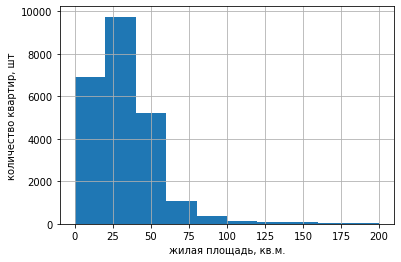

In [8]:
median_living_area = data.groupby('rooms')['living_area'].transform('median')
data['living_area'] = data['living_area'].fillna(median_living_area)
median_kitchen_area = data.groupby('rooms')['kitchen_area'].transform('median')
data['kitchen_area'] = data['kitchen_area'].fillna(median_kitchen_area)
fig, ax = plt.subplots()
data['living_area'].hist(grid = True, range = (0, 200))
ax.set_xlabel('жилая площадь, кв.м.')
ax.set_ylabel('количество квартир, шт');

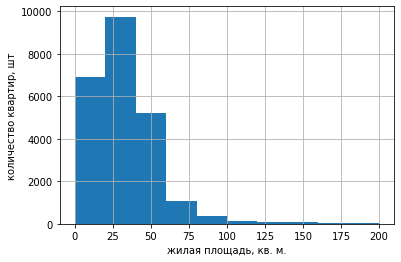

In [9]:
fig, ax = plt.subplots()
data['living_area'].hist(grid = True, range = (0, 200))
ax.set_xlabel('жилая площадь, кв. м.')
ax.set_ylabel('количество квартир, шт');

По сравнению с первыми гистограммами по данным столбцам - количество значений увеличилось (заполнились отсутствующие значения), значения площади остались без изменений (заполнены медианными значениями)

В столбце балконы необходимо заменить отсутствующие значения на 0. Скорее всего, именно из-за отсутствия балконы пользователь и не указал данные в этой строке.

In [10]:
data['balcony'] = data['balcony'].fillna(0)
print(data['balcony'].isna().sum())

0


Чтобы заполнить пропуски в столбце апартаменты, нужно уточнить, какие данные указаны в этом столбце.

In [12]:
print(data['is_apartment'].unique())

[nan False True]


Вероятнее всего, значения nan - это значения False. Пользователь не указал, что это апартаменты именно потому, что это не апартаменты.

In [13]:
data['is_apartment'] = data['is_apartment'].fillna('False')
print(data['is_apartment'].isna().sum())

0


Нужно удалить строки с незаполненными значениями в столбцах floors_total и locality_name

In [14]:
data = data.dropna(subset = ['floors_total', 'locality_name'])
print(data['floors_total'].isna().sum())
print(data['locality_name'].isna().sum())

0
0


Нужно исправить значения в столбце высота потолков. Можно взять усредненные данные, заполнить пропуски.

In [15]:
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(data['cityCenters_nearest'].median())
print(data['cityCenters_nearest'].isna().sum())

0


Для более корректного отображения данных можно изменить тип данных в некоторых столбцах. В столбцах floors_total, balcony сделаем данные типа int.

In [16]:
data['floors_total'] = data['floors_total'].astype('int')
data['balcony'] = data['balcony'].astype('int')

Необходимо устранить дубликаты значений в столбце locality_name. 

In [17]:
print(data.duplicated().sum()) 

0


In [18]:
print(data['locality_name'].unique())
print(data['locality_name'].value_counts())

['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'поселок Новый Све

Очевидно, что задваиваются значения с разным написанием слова "поселок". Заменяем "поселок" на "посёлок". Проверяем количество уникальных значений - стало 330

In [19]:
data['locality_name'] = data['locality_name'].str.replace("поселок", "посёлок")
print(data['locality_name'].value_counts())

Санкт-Петербург                               15651
посёлок Мурино                                  552
посёлок Шушары                                  439
Всеволожск                                      398
Пушкин                                          369
                                              ...  
деревня Реброво                                   1
деревня Снегирёвка                                1
деревня Кисельня                                  1
посёлок при железнодорожной станции Вещево        1
посёлок городского типа Кондратьево               1
Name: locality_name, Length: 330, dtype: int64


Проверяем значения в столбце 'ceiling_height'. Нужно поправить слишком большие значения(к примеру, значения больше 25), уменьшим их в 10 раз

In [20]:
data.loc[data['ceiling_height'] >= 25, ['ceiling_height']] = data['ceiling_height']/10
ceilings = data['ceiling_height']
ceilings = ceilings.sort_values()
print(ceilings.unique())

[ 1.    1.2   1.75  2.    2.2   2.25  2.3   2.34  2.4   2.45  2.46  2.47
  2.48  2.49  2.5   2.51  2.52  2.53  2.54  2.55  2.56  2.57  2.58  2.59
  2.6   2.61  2.62  2.63  2.64  2.65  2.66  2.67  2.68  2.69  2.7   2.71
  2.72  2.73  2.74  2.75  2.76  2.77  2.78  2.79  2.8   2.81  2.82  2.83
  2.84  2.85  2.86  2.87  2.88  2.89  2.9   2.91  2.92  2.93  2.94  2.95
  2.96  2.97  2.98  2.99  3.    3.01  3.02  3.03  3.04  3.05  3.06  3.07
  3.08  3.09  3.1   3.11  3.12  3.13  3.14  3.15  3.16  3.17  3.18  3.2
  3.21  3.22  3.23  3.24  3.25  3.26  3.27  3.28  3.29  3.3   3.31  3.32
  3.33  3.34  3.35  3.36  3.37  3.38  3.39  3.4   3.42  3.43  3.44  3.45
  3.46  3.47  3.48  3.49  3.5   3.51  3.52  3.53  3.54  3.55  3.56  3.57
  3.58  3.59  3.6   3.62  3.63  3.65  3.66  3.67  3.68  3.69  3.7   3.75
  3.76  3.78  3.8   3.82  3.83  3.84  3.85  3.86  3.87  3.88  3.9   3.93
  3.95  3.98  4.    4.06  4.1   4.14  4.15  4.19  4.2   4.25  4.3   4.37
  4.4   4.45  4.5   4.65  4.7   4.8   4.9   5.    5.

**3  Расчет новых данных**

Добавим столбец с ценой 1 кв. метра

In [21]:
data['metr_price'] = data['last_price']/data['total_area']
print(data.head(5))

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0  2019-03-07T00:00:00      3   
1             7   3350000.0        40.4  2018-12-04T00:00:00      1   
2            10   5196000.0        56.0  2015-08-20T00:00:00      2   
3             0  64900000.0       159.0  2015-07-24T00:00:00      3   
4             2  10000000.0       100.0  2018-06-19T00:00:00      2   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70            16         51.0      8        False  ...   
1            2.65            11         18.6      1        False  ...   
2            2.65             5         34.3      4        False  ...   
3            2.65            14         45.0      9        False  ...   
4            3.03            14         32.0     13        False  ...   

   balcony    locality_name  airports_nearest  cityCenters_nearest  \
0        0  Санкт-Петербург           18863.0              16028

Добавим столбец "День публикации объявления"

In [22]:
DATE_FORMAT = '%Y-%m-%dT%H:%M:%S'
data['time'] = pd.to_datetime(data['first_day_exposition'], format = DATE_FORMAT)
data['day_of_publ'] = data['time'].dt.weekday
print(data.head(5))

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0  2019-03-07T00:00:00      3   
1             7   3350000.0        40.4  2018-12-04T00:00:00      1   
2            10   5196000.0        56.0  2015-08-20T00:00:00      2   
3             0  64900000.0       159.0  2015-07-24T00:00:00      3   
4             2  10000000.0       100.0  2018-06-19T00:00:00      2   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70            16         51.0      8        False  ...   
1            2.65            11         18.6      1        False  ...   
2            2.65             5         34.3      4        False  ...   
3            2.65            14         45.0      9        False  ...   
4            3.03            14         32.0     13        False  ...   

   airports_nearest  cityCenters_nearest  parks_around3000  parks_nearest  \
0           18863.0              16028.0               1.

In [23]:
data['month_of_publ'] = data['time'].dt.month
print(data.head(5))

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0  2019-03-07T00:00:00      3   
1             7   3350000.0        40.4  2018-12-04T00:00:00      1   
2            10   5196000.0        56.0  2015-08-20T00:00:00      2   
3             0  64900000.0       159.0  2015-07-24T00:00:00      3   
4             2  10000000.0       100.0  2018-06-19T00:00:00      2   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70            16         51.0      8        False  ...   
1            2.65            11         18.6      1        False  ...   
2            2.65             5         34.3      4        False  ...   
3            2.65            14         45.0      9        False  ...   
4            3.03            14         32.0     13        False  ...   

   cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
0              16028.0               1.0          482.0  

In [24]:
data['year_of_publ'] = data['time'].dt.year
print(data.head(5))

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0  2019-03-07T00:00:00      3   
1             7   3350000.0        40.4  2018-12-04T00:00:00      1   
2            10   5196000.0        56.0  2015-08-20T00:00:00      2   
3             0  64900000.0       159.0  2015-07-24T00:00:00      3   
4             2  10000000.0       100.0  2018-06-19T00:00:00      2   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70            16         51.0      8        False  ...   
1            2.65            11         18.6      1        False  ...   
2            2.65             5         34.3      4        False  ...   
3            2.65            14         45.0      9        False  ...   
4            3.03            14         32.0     13        False  ...   

   parks_around3000  parks_nearest  ponds_around3000  ponds_nearest  \
0               1.0          482.0               2.0          7

In [25]:
data['floor_category'] = 'другой'
data.loc[data['floor'] == 1, 'floor_category'] = 'первый'
data.loc[data['floor'] == data['floors_total'], 'floor_category'] = 'последний'

In [26]:
data['cityCenters_km'] = round(data['cityCenters_nearest']/1000)
data['cityCenters_km'] = data['cityCenters_km'].astype('int')

**4  Исследовательский анализ данных**

Столбец last_price содержит большой разброс данных Сделаем столбец с данным в тыс.руб. Уточним минимальное и максимальное значение.

In [27]:
data['price_thousand'] = round(data['last_price']/1000)
print(data['price_thousand'].min())
print(data['price_thousand'].max())
print(data['last_price'].min())
print(data['last_price'].max())

12.0
763000.0
12190.0
763000000.0


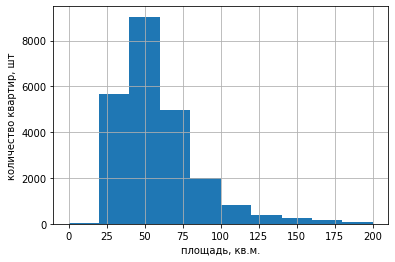

In [28]:
fig, ax = plt.subplots()
data['total_area'].hist(grid = True, range = (0, 200))
ax.set_xlabel('площадь, кв.м.')
ax.set_ylabel('количество квартир, шт');

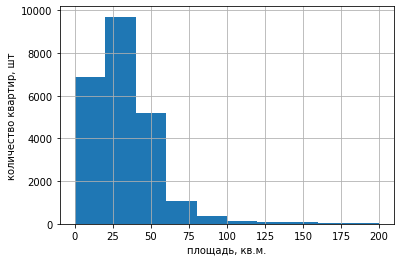

In [29]:
fig, ax = plt.subplots()
data['living_area'].hist(grid = True, range = (0, 200))
ax.set_xlabel('площадь, кв.м.')
ax.set_ylabel('количество квартир, шт');

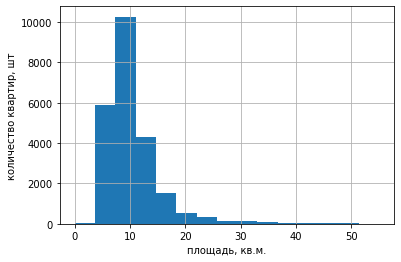

In [30]:
fig, ax = plt.subplots()
data['kitchen_area'].hist(grid = True, bins = 15, range = (0, 55))
ax.set_xlabel('площадь, кв.м.')
ax.set_ylabel('количество квартир, шт');

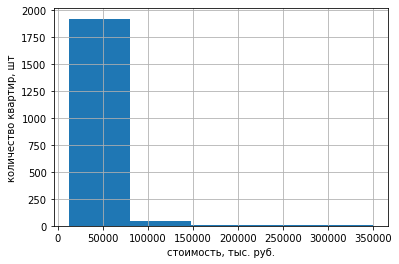

In [31]:
fig, ax = plt.subplots()
data['price_thousand'].hist(grid = True, bins = 5, range = (12000, 350000))
ax.set_xlabel('стоимость, тыс. руб.')
ax.set_ylabel('количество квартир, шт');

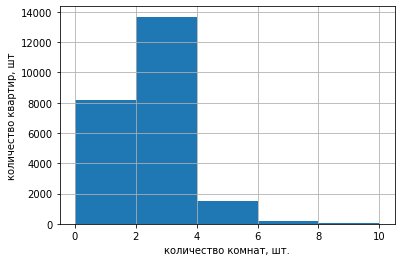

In [32]:
fig, ax = plt.subplots()
data['rooms'].hist(grid = True, bins = 5, range=(0, 10))
ax.set_xlabel('количество комнат, шт.')
ax.set_ylabel('количество квартир, шт');

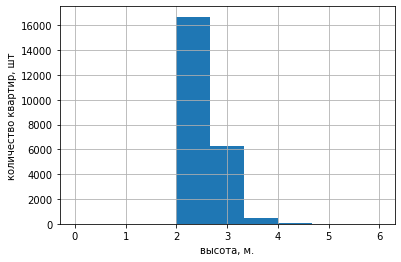

In [33]:
fig, ax = plt.subplots()
data['ceiling_height'].hist(grid = True, bins = 9, range=(0, 6))
ax.set_xlabel('высота, м.')
ax.set_ylabel('количество квартир, шт');

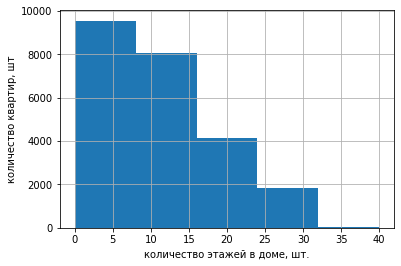

In [34]:
fig, ax = plt.subplots()
data['floors_total'].hist(grid = True, bins = 5, range=(0, 40))
ax.set_xlabel('количество этажей в доме, шт.')
ax.set_ylabel('количество квартир, шт');

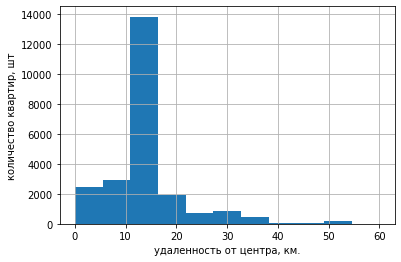

In [35]:
fig, ax = plt.subplots()
data['cityCenters_km'].hist(grid = True, bins =11, range=(0, 60))
ax.set_xlabel('удаленность от центра, км.')
ax.set_ylabel('количество квартир, шт');

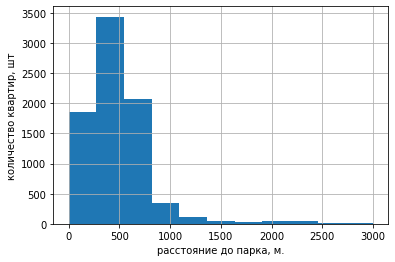

In [36]:
fig, ax = plt.subplots()
data['parks_nearest'].hist(grid = True, bins =11, range=(0, 3000))
ax.set_xlabel('расстояние до парка, м.')
ax.set_ylabel('количество квартир, шт');

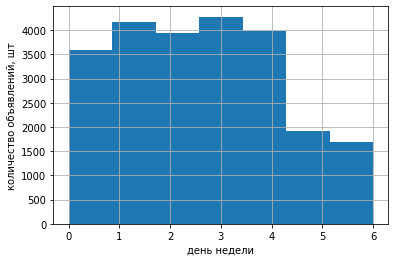

In [37]:
fig, ax = plt.subplots()
data['day_of_publ'].hist(grid = True, bins=7, range=(0, 6))
ax.set_xlabel('день недели')
ax.set_ylabel('количество объявлений, шт');

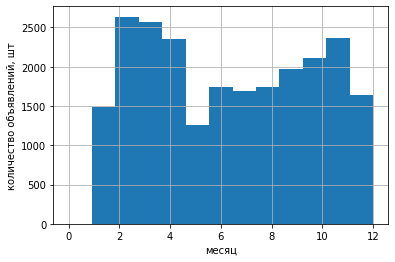

In [38]:
fig, ax = plt.subplots()
data['month_of_publ'].hist(grid = True, bins=13, range=(0, 12))
ax.set_xlabel('месяц')
ax.set_ylabel('количество объявлений, шт');

Гистограммы позволяют наглядно рассмотреть данные. В большинстве квартир площадь до 200 кв.м., и только в минимальном колистве квартир более 200. Жилая площадь у большинства квартир до 80 кв.м. Площадь кухни чуть более 20 кв.м., есть небольшое количество квартир, в которых площадь кухни больше 20 и до 40 кв.м. Цена квартир до 2000 тыс. руб. Некоторые значения доходят до 763000 тыс. Количество комнат в большинстве объявлений - до 3, есть некоторое количество квартир с количеством комнат до 7. Высота потолков соответствуют средним значениям - до 3 метров, но есть и квартиры с высотой потолков около 4 метров. Этажей всего в доме 12, чуть меньшее количество домов с этажностью до 25 этажей, и чуть больше 1000 квартир, находящихся в домах с этажностью более 30. По удаленности от центра большинство квартир расположены в радиусе чуть более 10 км. 6500 квартир находятся в радиусе до 27 километров от центра. 1800 квартир расположены в радиусе до 40 км от центра. И есть минимальное количество ещё более удаленных от центра квартир. Расстояние до ближайшего парка у большинства квартир чуть более 500 м, у 1200 квартир - 1200 м. По срокам публикации объявления 15000 квартир представлены 300 дней, 2500 квартир - чуть более 600 дней. Есть и объявления, опубликованные более 900 дней и даже больше 1200 дней. По дням публикации можно однозначно сказать, что в будние дни желающих разместить объявление в 2 раза больше, чем в выходные (по 4000 объявлений в каждый будний днеь против 2000 объявлений в каждый выходной). По месяцам публикации отчетлива видна тенденция размещать объявления в период с октября по март.

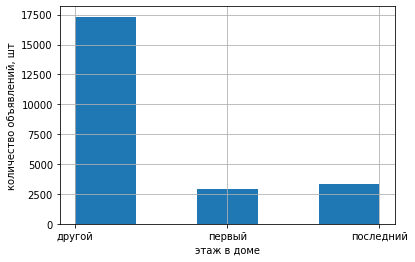

In [39]:
fig, ax = plt.subplots()
data['floor_category'].hist(bins = 5)
ax.set_xlabel('этаж в доме')
ax.set_ylabel('количество объявлений, шт');

Отдельно рассмотрим столбец days_exposition.

In [40]:
data['days_exposition'].describe().T

count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

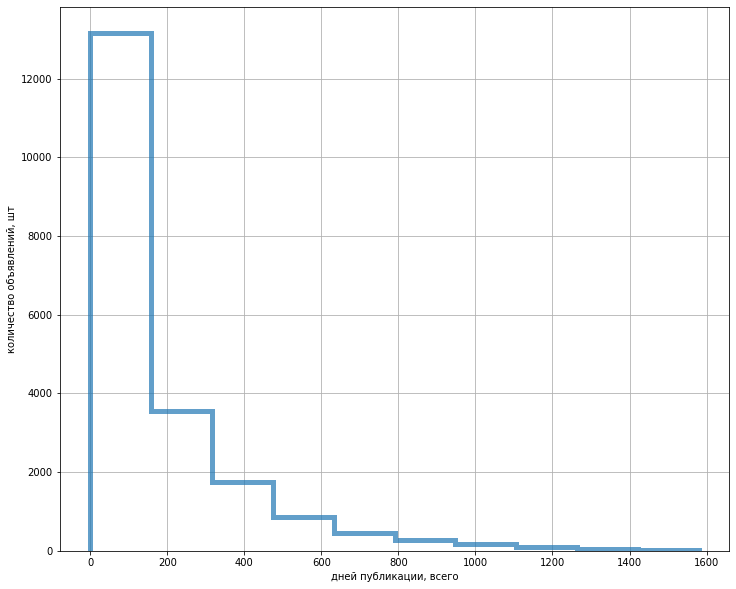

In [41]:
fig, ax = plt.subplots()
data['days_exposition'].hist(
    histtype='step',
    range=(0, 1580),
    linewidth=5,
    alpha=0.7,
    grid=True,
    figsize=(12, 10),
)
ax.set_xlabel('дней публикации, всего')
ax.set_ylabel('количество объявлений, шт');

После метода describe видим, что среднее арифметическое значение количества дней публикации = 180 дням. Медиана = 95 дням Самый длинный срок размещения объявления - 1580 дней, что даже больше 4 лет. 13000 объявлений было размещено на протяжении менее, чем 200 дней. Такой срок можно назвать нормальным сроком продажи квартиры по объявлению. Медианное значение и меньше можно назвать быстрой продажей. А вот срок превышающий 200 дней можно уже назвать долгим.

Проверим зависимость цены квартиры от разных факторов: общей площади; жилой площади; площади кухни; количества комнат; этажа, на котором расположена квартира (первый, последний, другой); даты размещения (день недели, месяц, год)

              total_area  living_area  kitchen_area  last_price
total_area      1.000000     0.909874      0.587172    0.653621
living_area     0.909874     1.000000      0.423291    0.556043
kitchen_area    0.587172     0.423291      1.000000    0.454198
last_price      0.653621     0.556043      0.454198    1.000000


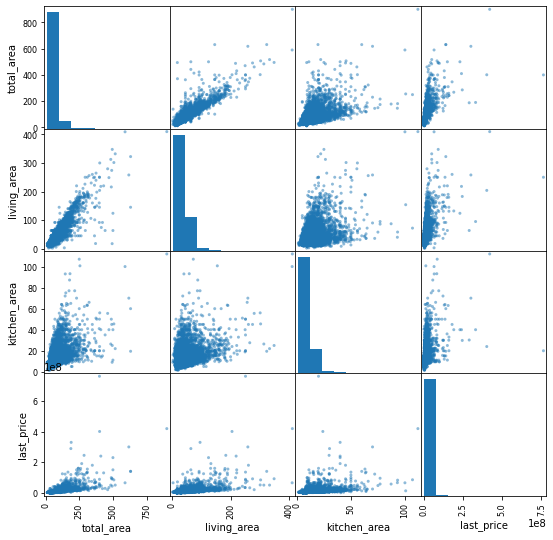

In [42]:
data_analitic = data[['total_area', 'living_area', 'kitchen_area', 'last_price']]
pd.plotting.scatter_matrix(data_analitic, figsize=(9, 9))                         
print(data_analitic.corr())

Очевидна прямая зависимость между общей площадью и жилой. Это же показывает и коэффициент корреляции - 0,94. Зависимость между общей площадью и площадью кухни чуть меньше, коэффициент - 0,61. Зависимость между общей площадью квартиры и ценой также прямо пропорциональна, коэффициент корреляции - 0,65. Из данных величин на размер цены больше всего влияет именно общая площадь. Жилая площадь и цена коррелирует с коэффициентом - 0,57, площадь кухни влияет на цену с коэффициентом - 0,52. Матрица рассеяния наглядно показывает эти зависимости.

0.3631905485065751
0.026841775356835608


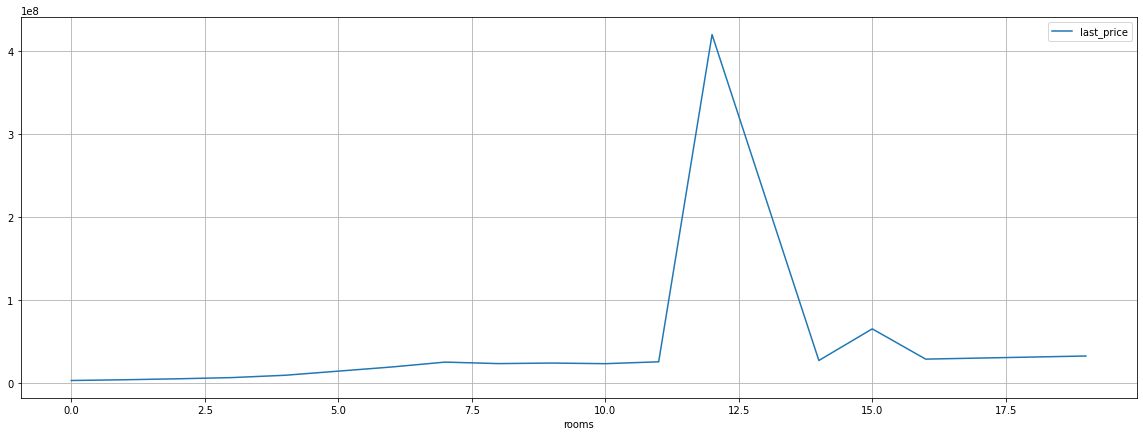

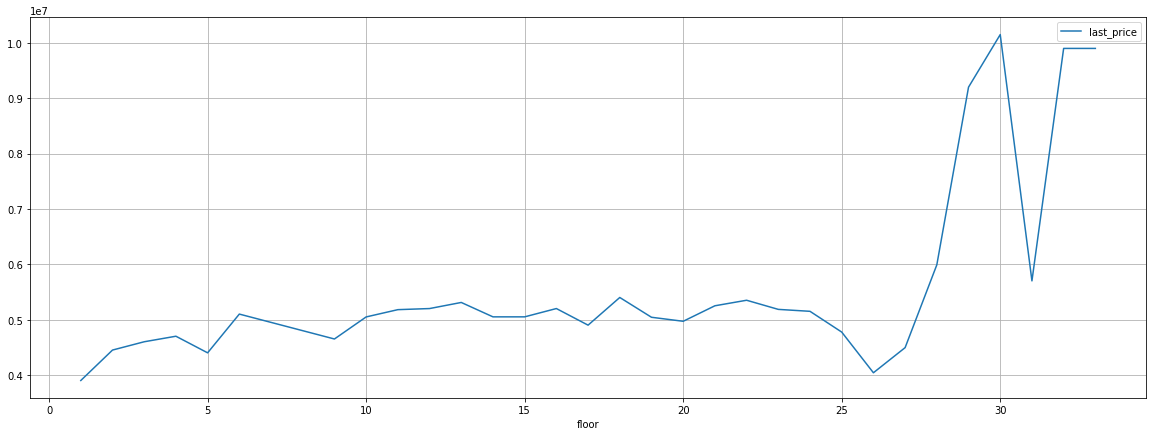

In [43]:
data.pivot_table(index='rooms', values='last_price', aggfunc='median').plot(grid=True, figsize=(20, 7))
data.pivot_table(index='floor', values='last_price', aggfunc='median').plot(grid=True, figsize=(20, 7))
print(data['last_price'].corr(data['rooms']))
print(data['last_price'].corr(data['floor']))

Графики позволяют увидеть, что зависимости между количеством комнат и ценой нет. Есть разовый скачок со значительным рывком в размере цены, но это некий выброс данных. В целом видна положительная динамика в возрастании цены вместе с увеличеснием количества комнат. Коэффициент корреляции в данной зависимости = 0,36. Однозначной зависимости между увеличеснием этажа квартиры и её стоимостью не обнаружено. График цена/этаж квартиры показывает колебания цены, но они не зависят от этажности квартиры. Коэффициент корреляции подверждает данный вывод, он равен 0,27.

Рассмотрим влияет ли на цену день недели, месяц, год публикации объявления.

0.0013569211122710747
0.0027259571647347564
-0.04286415271361107
                last_price
year_of_publ              
2014          1.204660e+07
2015          8.595669e+06
2016          6.829117e+06
2017          6.582530e+06
2018          5.954065e+06


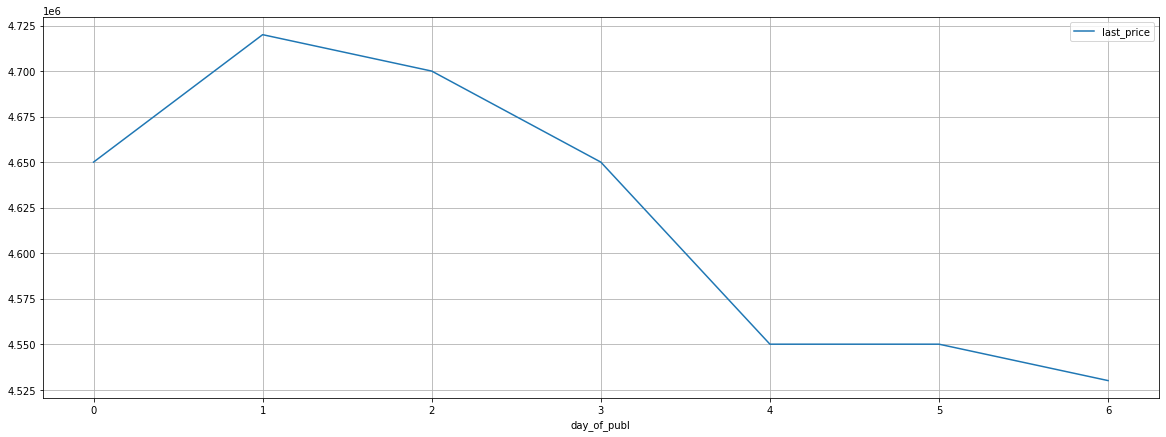

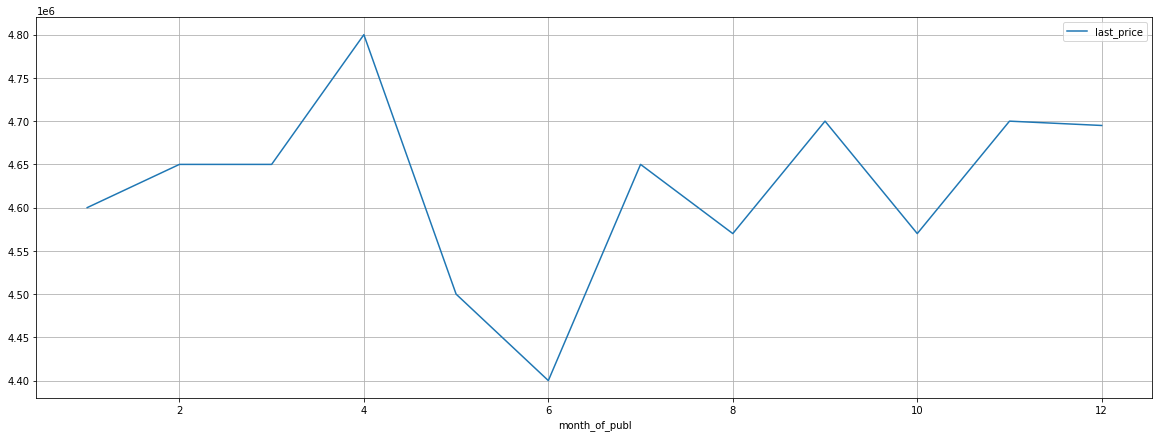

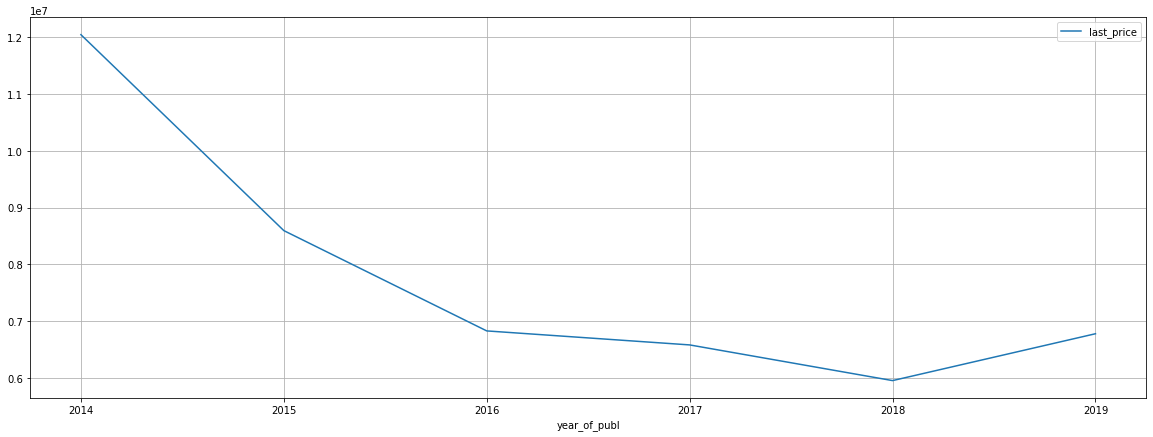

In [44]:
data['time'] = pd.to_datetime(data['first_day_exposition'], format = DATE_FORMAT)
data['day_of_publ'] = data['time'].dt.weekday
data['month_of_publ'] = data['time'].dt.month
data['year_of_publ'] = data['time'].dt.year
data.pivot_table(index='day_of_publ', values='last_price', aggfunc='median').plot(grid=True, figsize=(20, 7))
data.pivot_table(index='month_of_publ', values='last_price', aggfunc='median').plot(grid=True, figsize=(20, 7))
data.pivot_table(index='year_of_publ', values='last_price', aggfunc='mean').plot(grid=True, figsize=(20, 7))
print(data['last_price'].corr(data['day_of_publ']))
print(data['last_price'].corr(data['month_of_publ']))
print(data['last_price'].corr(data['year_of_publ']))
print(data.pivot_table(index='year_of_publ', values='last_price', aggfunc='mean').head())

Зависимости между днем и месяцем публикации нет. Графики показывают нестабильную динамику цены в зависимости от дня недели или месяца публикации. Коэффициент = 0,002 и 0,003, что говорит об очень малой взаимозависимости факторов. А вот изменение цен по годам показывает их снижение. Коэффициент корреляции отрицательный = -0,04.

Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Для этого сначала необходимо найти населенные пункты с наибольшим количеством объявлений. Добавляем столбцы со сгруппированными данными по населенным пунктам по стоимости квартир, общей площадью квартир. И ещё один столбец, где находим среднее значение для каждого населенного пункта. Выстраиваем рейтинг по уменьшению количества объявлений для каждого населенного пункта.

In [45]:
locality_rating = data.groupby(['locality_name']).agg({'price_thousand':'count'})
locality_rating['price_summ'] = data.groupby(['locality_name']).agg({'price_thousand':'sum'})
locality_rating['area_summ'] = data.groupby(['locality_name']).agg({'total_area':'sum'})
locality_rating['price_middle'] = locality_rating['price_summ']/locality_rating['area_summ']
locality_rating = locality_rating.sort_values('price_thousand', ascending = False)
print(locality_rating.head(10)) 

                   price_thousand   price_summ   area_summ  price_middle
locality_name                                                           
Санкт-Петербург             15651  126223680.0  1013344.99    124.561409
посёлок Мурино                552    2017392.0    24292.56     83.045673
посёлок Шушары                439    1804205.0    23656.36     76.267228
Всеволожск                    398    1508048.0    22296.83     67.635085
Пушкин                        369    2387075.0    22712.98    105.097394
Колпино                       338    1339840.0    17992.24     74.467659
посёлок Парголово             327    1467600.0    16847.50     87.110847
Гатчина                       307    1070919.0    15639.48     68.475359
деревня Кудрово               299    1266013.0    13924.95     90.916879
Выборг                        237     770483.0    13307.56     57.898142


Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра.

In [46]:
print(locality_rating.loc[locality_rating['price_middle'] == locality_rating['price_middle'].max(), 'price_middle']) 
print(locality_rating.loc[locality_rating['price_middle'] == locality_rating['price_middle'].min(), 'price_middle'])

locality_name
Санкт-Петербург    124.561409
Name: price_middle, dtype: float64
locality_name
деревня Старополье    11.183144
Name: price_middle, dtype: float64


Рассмотрим квартиры в Санкт-Петербурге. Вычислим среднюю цену каждого километра.

cityCenters_km
0     31449.111111
1     21206.718750
2     17788.319355
3     11137.393678
4     13304.279070
5     14455.996721
6     15338.420712
7     14775.150000
8      9949.111111
9      6956.583756
10     6500.435933
11     6228.106838
12     5834.619524
13     6466.644606
14     5625.172414
15     5876.322870
16     5373.131225
17     5299.495972
18     5091.329502
19     5051.410256
20     5951.469388
21     5493.470085
22     5415.524752
23     4985.376471
24     3854.423077
25     4052.846154
26     4014.325581
27     8300.000000
28     5026.428571
29     4236.666667
Name: price_thousand, dtype: float64


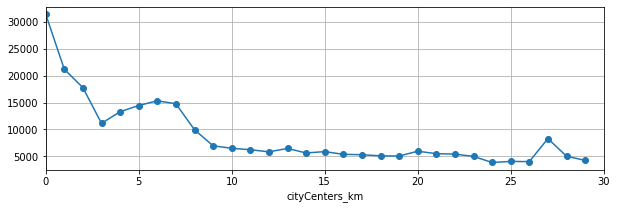

In [48]:
data_SP = data.loc[data['locality_name'] == 'Санкт-Петербург']
data_SP_grouped = data_SP.groupby('cityCenters_km')['price_thousand'].mean()
print(data_SP_grouped)
data_SP_grouped.plot(x='cityCenters_km', y='price_thousand', style='o-', xlim=(0, 30), grid=True, figsize=(10, 3));

Наш график показывает отчетливую зависимость стоимости жилья от увеличения расстояния до центра - цена уменьшается с ростом расстояния до центра города. Причем изменения в цене на первых 3 километрах от центра значительные. На рсстоянии 3-7 км от центра наблюдается даже отрицательная динамика в изменении цены - цена возрастает при увеличении удаленности от центра. Т.к. это достаточно небольшая удаленность от центра, то при примерно равных условиях по расположению, здесь на цену большее влияние оказывают другие факторы (площадь квартиры, площадь кухни, этажность и т.д.). А вот после 7 км от центра прослеживается небольшое, но стабильное уменьшение цены. Резкий скачок после 26 км удаленности от центра возможно некий выброс в общих данных стоимости жилья.

**5  Общий вывод**

Предоставлены данные сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах для его изучения и обнаружения особенностей и зависимостей. Для их выявления необходимо выполнить предобработку данных.

I. Общий анализ

Первый этап работы с предоставленной информацией – общий анализ. Были рассмотрены общие характеристики таблицы. Имеется 23699 объявлений о продаже квартир в Ленинградской области и Санкт-Петербурге. Объявления содержат информацию о площади квартиры, жилой площади квартиры, площади кухни, географическом расположении дома, параметрах дома и т.д. Таблица заполнена не полностью. Есть отсутствующие данные в некоторых столбцах. Например, данные о наличии балконов есть не во всех квартирах - но это объяснимо, балконы есть не во всех квартирах. Вероятнее всего, именно поэтому пользователь не указал в данной строке никаких данных. Приблизительно в 25% объявлений отсутствуют данные о географическом расположении - расстоянии до аэропорта, расстоянии до центра города, наличие парков вокруг и др. Есть объявления, где пропущено даже название населенного пункта. Для упрощения визуализации данных, представленных в таблице, строим диаграммы. Для каждого столбца по отдельности. Гистограммы позволяют увидеть распределение данных среди всех группы значений. Среди всех гистограмм можно выделить некоторые. Например, показатели гистограммы с общей площадью квартир говорят о том, что у 90% представленных объявлений общая площадь до 100 кв. м. Пропорционально размерам общей площади изменяются и гистограммы с данными о жилой площади и площади кухни, что объяснимо типичными планировками квартир. Количество комнат в квартирах в большинстве случаев 3-4, чуть меньше объявлений с количеством комнат 1-2, и совсем мало, где количество комнат более 4. Приблизительно похожими выглядят данные об имеющихся поблизости прудах и парках. Наибольшее количество квартир с одним парком и прудом поблизости, чуть менее – с двумя и т.д. Расстояние до ближайшего пруда и парка также аналогично, однако есть объявления, где дистанция до парка превышает 1500 и даже 2000 метров, а до прудов таких далеких расстояний нет. Объявления были опубликованы разное по длительности время. Основная масса публикаций сроком до 500 дней.

II Предобработка данных.

Для более подробного исследования необходимо провести некоторую дополнительную обработку данных. В первую очередь, проверим столбцы, имеющие недостающие значения. Это столбцы с высотой потолков, количеством этажей в доме, жилой площадью, отметкой «апартаменты», площадью кухни, наличием балкона, расстоянием до аэропорта, центра города, ближайшего парка, ближайшего пруда, количеством парков и прудов в радиусе 3000 метров от дома, количество дней публикации. Пропуски в столбце с высотой потолков заполняем медианными значениями, поскольку высота потолков в большинстве домов приблизительно одинакова. Таким образом, весь столбец будет заполнен корректными и готовыми для дальнейшего использования данными. В столбцах жилая площадь и площадь кухни заполняем пропуски. Логично предположить, что заполнение пропусков медианными значениями жилой площади и площади кухни в зависимости от общей площади квартиры компенсирует отсутствующие данные достаточно точно. Планировки квартир достаточно стандартные. Столбец балконы не заполнен в 11519 объявлениях из 23699. Это не похоже на ошибку программы, вероятнее всего, данные заполнены таким образом пользователями, которые пытались указать на отсутствие балкона в их квартире. Заполняем отсутствующие данные «0». В 20 тыс. объявлений пропущено значение «апартаменты». Такое большое количество пропусков также говорит о сознательном невнесении данных пользователями. В столбце могут быть два варианта обозначений – «True» и «False». Наиболее вероятно, что пользователи – обладатели квартир, не указали отдельно, что это не апартаменты. Заполняем отсутствующие значения значением «False». Таким образом, столбец будет заполнен корректно. Отсутствуют данные в 86 объявлениях в столбце с указанием количества этажей в доме, и в 49 объявлениях в столбце с данными о названии населенного пункта. Заполнить данные средними или иными значениями не представляется возможным. Т.к. количество данных объявлений составляет менее 0,5% от общего количества, удаляем данные строки, чтобы отсутствие в них данных не мешало дальнейшему анализу. При рассмотрении типа данных в каждом столбце таблицы, обнаруживаются некоторые неточности. Столбцы «количество этажей в доме» и «количество балконов» имеют тип – вещественные. Несомненно, что количество этажей или балконов дробным быть не может, а потому меняем тип данных на целые числа. Таким образом, данные в таблице будут выглядеть визуально приятнее, и правильнее с точки зрения логики. Столбец с данным о названии населенного пункта необходимо дополнительно рассмотреть. Данные в этом столбце заполняются пользователями, а потому возможны ошибки. При проверке на наличие явных дубликатов, таковых не обнаружено. Однако, отсортировав столбец по наименованиям по алфавиту, видно, что некоторые названия дублируются из-за разного написания буквы «ё» («поселок Аннино», «посёлок Аннино» и т.п.) Использовании функции, заменяющей букву «е» на «ё», устраняем данную ошибку. Исправлять нужно только слово «поселок», исправление буквы «е» на «ё» в других словах может привести к грамматическим ошибкам. Благодаря произведенным изменениям общее количество наименований в таблице сократилось с 364 до 330 значений. Столбец с высотой потолков также заполнен данными с величиной значений 20-45 метров. Вероятнее всего, данные цифры были указаны ошибочно, пользователь подразумевал 2,5 – 4,5 метра. Значения, превышающие 25 метров, сокращаем в 10 раз. Теперь данные с высотой потолка корректны.

III Внесение дополнительных данных.

На основании имеющейся в таблице информации можем дополнительно рассчитать данные, которые также позволят выявить закономерности и особенности в недвижимости Ленинградской области, или, добавленные к объявлению, помогут потенциальным клиентам получить больше информации о жилье. Добавляем столбцы с расчётными данными о цене 1 кв. м. квартиры, дне, месяце и годе публикации объявления. Добавляем категории принадлежности квартиры по этажам: «первый», «последний», «другое». Такие критерии могут понадобиться пользователям Яндекс Недвижимости, поскольку это один из серьезных аргументов при выборе квартиры. Переводим столбец с расстоянием до центра в км – визуально облегчит поиск жилья по географическому расположению.

IV Исследовательский анализ данных.

Отдельно рассмотрим некоторые параметры объявлений: общая площадь, жилая площадь, площадь кухни, цена объекта, количество комнат, высота потолка, этаж объекта, этажность дома в целом, тип этажа квартиры, географические данные по расположению. Для визуального исследования каждого параметра построим гистограмму. В большинстве квартир площадь до 200 кв.м., и только в минимальном количестве квартир более 200. Жилая площадь у большинства квартир до 80 кв.м. Площадь кухни чуть более 20 кв.м., есть небольшое количество квартир, в которых площадь кухни больше 20 и до 40 кв.м. Цена квартир до 2000 тыс. руб. Некоторые значения доходят до 763000 тыс. Количество комнат в большинстве объявлений - до 3, есть некоторое количество квартир с количеством комнат до 7. Высота потолков соответствуют средним значениям - до 3 метров, но есть и квартиры с высотой потолков около 4 метров. Дома в объявлениях представлены 12-этажные, чуть меньшее количество домов с этажностью до 25 этажей, и чуть больше 1000 квартир, находящихся в домах с этажностью более 30. По удаленности от центра большинство квартир расположены в радиусе чуть более 10 км. 6500 квартир находятся в радиусе до 27 километров от центра. 1800 квартир расположены в радиусе до 40 км от центра. И есть минимальное количество ещё более удаленных от центра квартир. Расстояние до ближайшего парка у большинства квартир чуть более 500 м, у 1200 квартир - 1200 м. По срокам публикации объявления 15000 квартир представлены 300 дней, 2500 квартир - чуть более 600 дней. Есть и объявления, опубликованные более 900 дней и даже больше 1200 дней. По дням публикации можно однозначно сказать, что в будние дни желающих разместить объявление в 2 раза больше, чем в выходные (по 4000 объявлений в каждый будний день против 2000 объявлений в каждый выходной). По месяцам публикации отчетлива видна тенденция размещать объявления в период с октября по март. Для изучения столбца с количеством дней публикации объявлений постоим гистограмму, рассмотрим общие параметры данных в этом столбце. Среднее количество дней публикации – 181 день, медиана – 95 дней. Минимальное значение – 1 день, но есть и объявления, опубликованные более года, самое большое значение - 1580 дней. Публикации, равные среднему значению можно назвать обычным сроком продажи. Все объявления, опубликованные более года, можно назвать долгими. Продажи, длящиеся более 2 лет можно назвать необычайно долгими. Исследуем зависимость цены от параметров площади квартиры. Зависимость между общей площадью квартиры и ценой также прямо пропорциональна, коэффициент корреляции - 0,65. Из данных величин на размер цены больше всего влияет именно общая площадь. Жилая площадь и цена коррелирует с коэффициентом - 0,57, площадь кухни влияет на цену с коэффициентом - 0,52. Матрица рассеяния наглядно показывает эти зависимости. Графики позволяют увидеть, что зависимости между количеством комнат и ценой нет. Есть разовый скачок со значительным рывком в размере цены, но это некий выброс данных. В целом видна положительная динамика в возрастании цены вместе с увеличением количества комнат. Коэффициент корреляции в данной зависимости = 0,36. Однозначной зависимости между увеличением этажа квартиры и её стоимостью не обнаружено. График цена/этаж квартиры показывает колебания цены, но они не зависят от этажности квартиры. Коэффициент корреляции подтверждает данный вывод, он равен 0,27. Среди населенных пунктов с самым большим количеством объявлений вычисляем стоимость 1 квадратного метра. Населенным пунктом с самым дорогой стоимостью кв. м. ожидаемо оказался Санкт-Петербург – 124 514 руб., десятым по количеству объявлений стал Выборг. Стоимость 1 кв. м. в нем – 57 898 руб. В Санкт-Петербурге достаточно большой разброс жилья по расстоянию от центра. Логично предположить, что в зависимости от удаленности от центра цена жилья падает. Наше исследование подтверждает эту гипотезу. Однако, стоит отметить, что на расстоянии до 2 км от центра скачок в стоимости жилья значительный – от стоимости свыше 30 000 тыс. руб. до 10 000 тыс. руб. Зона радиусом 2-7 км от центра не показывает однозначного изменения цены от расстояния. Вероятнее всего, при общей приемлемой расположенности квартир недалеко от центра, здесь на цену большее влияние оказывают другие факторы (площадь квартиры, площадь кухни, этажность и т.д.). Удаленность свыше 7 км от центра показывает стабильное снижение цены при общем возрастании расстояния.